In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('20240525 Board dataset.xlsx')
df = pd.DataFrame(data)
df

,Identifier,Individual Code,Company code,Year,Company name,Name,BoD,Executive,Independent,Foreign,...,Audit Committee,Remuneration Committee,Nomination Committee,Corporate Governance Committee,Supervisory Board,Sustainability Committee,Risk Management Committee,Ethics and Conduct Committee,Managing Committee,Internal Control Committee
0,5001,20028.0,355,2013,Galp Energia,Américo Amorim,Chair,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5002,20491.0,355,2013,Galp Energia,Manuel Ferreira De Oliveira,1,CEO,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5003,20468.0,355,2013,Galp Energia,Luís Palha da Silva,1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5004,20606.0,355,2013,Galp Energia,Paula Amorim,1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5005,20220.0,355,2013,Galp Energia,Filipe Silva,1,1,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,7462,20680.0,311,2023,Eurobic / Banco Bic,Rui Miguel Morais Lopes,1,1,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,7463,20650.0,311,2023,Eurobic / Banco Bic,Plácido Norberto dos Inocentes,1,NaN,NaN,0,...,Chairman,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2463,7464,20233.0,311,2023,Eurobic / Banco Bic,Francisco Manuel Constantino Pinto,1,NaN,NaN,0,...,1,Chair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,7465,20279.0,311,2023,Eurobic / Banco Bic,Ilídio Tomás Lopes,1,NaN,NaN,0,...,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_2013 = df[df['Year']== 2013]
data_2016 = df[df['Year']== 2016]
data_2019 = df[df['Year']== 2019]
data_2020 = df[df['Year']== 2020]
data_2021 = df[df['Year']== 2021]
data_2022 = df[df['Year']== 2022]
data_2023 = df[df['Year']== 2023]
data_2019[data_2019['Gender']==1].count()

Identifier                        71
Individual Code                   71
Company code                      71
Year                              71
Company name                      71
Name                              71
BoD                               61
Executive                         18
Independent                       31
Foreign                           71
Gender                            71
Date of first appointment         47
Term end date                     57
Total Compensation                43
Fixed Compensation                 0
Variable Compensation              0
Audit Committee                   20
Remuneration Committee             7
Nomination Committee               1
Corporate Governance Committee     5
Supervisory Board                  0
Sustainability Committee           1
Risk Management Committee          2
Ethics and Conduct Committee       0
Managing Committee                 0
Internal Control Committee         2
dtype: int64

## 2013

In [4]:
gender_2013 = data_2013['Gender'].sum()
average_2013 = data_2013['Gender'].mean()
#print('Number of Female Members in 2013 =',gender_2013,'\nPercentage of Female Members in 2013 =',average_2013*100,'%')


fr_2013 = data_2013['Foreign'].sum()
fraverage_2013 = data_2013['Foreign'].mean()
#print('Number of Foreign Members in 2013 =',fr_2013,'\nPercentage of Foreign Members in 2013 =',fraverage_2013*100,'%')


inde_2013 = data_2013['Independent'].sum()
print('Number of Independent Members in 2013 =',inde_2013,'\nNumber of Female Members in 2013 =',gender_2013,'\nNumber of Foreign Members in 2013 =',fr_2013)

Number of Independent Members in 2013 = 27.0 
Number of Female Members in 2013 = 17 
Number of Foreign Members in 2013 = 9


In [5]:
chair_2013 = data_2013[data_2013['BoD']=='Chair'].count()
chair_2013['BoD']

13

In [6]:
value = 'Altri'
key = 2016
grouped = data_2013.groupby(['Company name', 'Year'])
grouped_dfs = {group: data for group, data in grouped}
d = list(grouped_dfs.keys())[0]
#k = grouped_dfs[(value,key)]
d

('Banco BPI', 2013)

In [7]:
gender = []
foreign = []
for i in range(len(grouped_dfs)):
    d = list(grouped_dfs.values())[i]
    o = d.count()
    g = d['Gender'].sum()/o['Gender']
    f = d['Foreign'].sum()/o['Foreign']
    gender.append(g)
    foreign.append(f)

gender_2013_percentage = sum(gender)*100/len(gender)
foreign_2013_percentage = sum(foreign)*100/len(foreign)
print('Pecentage of Female Members in 2013 =',gender_2013_percentage,'\nPecentage of Foreign Members in 2013 =',foreign_2013_percentage)

Pecentage of Female Members in 2013 = 8.411898375637154 
Pecentage of Foreign Members in 2013 = 3.479920537128775


## Generalized Method

In [12]:
def standard_analysis(df):
   
    gender_sum = df['Gender'].sum()
    gender_avg = df['Gender'].mean()*100

    foreign_sum = df['Foreign'].sum()
    foreign_avg = df['Foreign'].mean()*100

    result = {
        'Gender_Sum': gender_sum,
        'Gender_Average': gender_avg,
        'Foreign_Sum': foreign_sum,
        'Foreign_Average': foreign_avg
    }
    return result

In [14]:
analysis_2013 = standard_analysis(data_2013)
analysis_2016 = standard_analysis(data_2016)
analysis_2019 = standard_analysis(data_2019)
analysis_2020 = standard_analysis(data_2020)
analysis_2021 = standard_analysis(data_2021)
analysis_2022 = standard_analysis(data_2022)
analysis_2023 = standard_analysis(data_2023)

In [17]:
print('Analysis of 2013:',analysis_2013)
print('Analysis of 2016:',analysis_2016)
print('Analysis of 2019:',analysis_2019)
print('Analysis of 2020:',analysis_2020)
print('Analysis of 2021:',analysis_2021)
print('Analysis of 2022:',analysis_2022)
print('Analysis of 2023:',analysis_2023)

Analysis of 2013: {'Gender_Sum': 17, 'Gender_Average': 8.095238095238095, 'Foreign_Sum': 9, 'Foreign_Average': 4.285714285714286}
Analysis of 2016: {'Gender_Sum': 28, 'Gender_Average': 12.844036697247708, 'Foreign_Sum': 11, 'Foreign_Average': 5.045871559633028}
Analysis of 2019: {'Gender_Sum': 71, 'Gender_Average': 21.779141104294478, 'Foreign_Sum': 24, 'Foreign_Average': 7.361963190184049}
Analysis of 2020: {'Gender_Sum': 103, 'Gender_Average': 24.641148325358852, 'Foreign_Sum': 32, 'Foreign_Average': 7.655502392344498}
Analysis of 2021: {'Gender_Sum': 124, 'Gender_Average': 27.252747252747252, 'Foreign_Sum': 46, 'Foreign_Average': 10.10989010989011}
Analysis of 2022: {'Gender_Sum': 128, 'Gender_Average': 30.18867924528302, 'Foreign_Sum': 39, 'Foreign_Average': 9.19811320754717}
Analysis of 2023: {'Gender_Sum': 130, 'Gender_Average': 31.32530120481928, 'Foreign_Sum': 41, 'Foreign_Average': 9.879518072289157}


## Graphs

In [96]:
years = (2013,2016,2019,2020,2021,2022,2023)
female = (7,28,71,103,124,128,130)
female_percentage = (8.10,12.85,21.78,24.64,27.25,30.19,31.33)
foreign = (9,11,24,32,46,39,41)
foreign_percentage = (4.29,5.05,7.36,7.66,10.11,9.20,9.88)

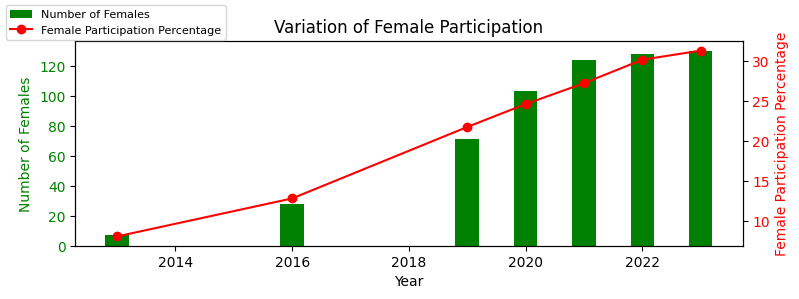

In [97]:
fig, ax1 = plt.subplots(figsize=(8, 3))


ax1.bar(years, female, width=0.4, color='g', align='center',label="Number of Females")
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Females', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(years, female_percentage, color='r', marker='o', linestyle='-',label="Female Participation Percentage")
ax2.set_ylabel('Female Participation Percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Variation of Female Participation')
fig.tight_layout()

fig.legend(loc='upper left',fontsize=8)
plt.show()

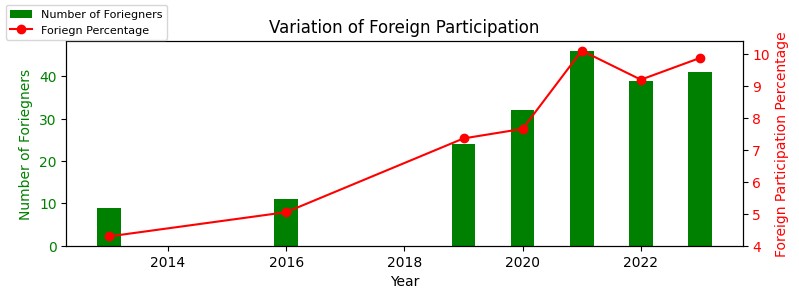

In [106]:
fig, ax1 = plt.subplots(figsize=(8, 3))


ax1.bar(years, foreign, width=0.4, color='g', align='center',label="Number of Foriegners")
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Foriegners', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(years, foreign_percentage, color='r', marker='o', linestyle='-',label="Foriegn Percentage")
ax2.set_ylabel('Foreign Participation Percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Variation of Foreign Participation')
fig.tight_layout()

fig.legend(loc='upper left',fontsize=8)
plt.show()

## 2023 - Plot

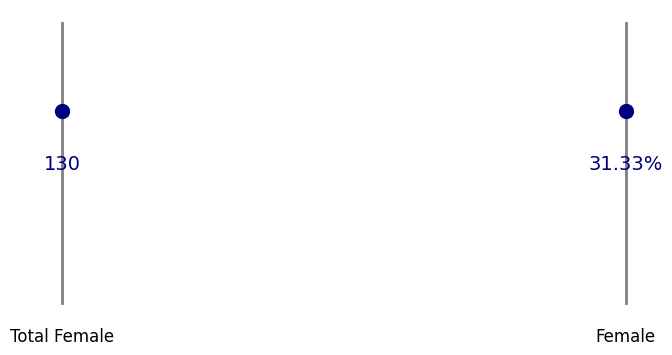

In [115]:
categories = ['Total Female', 'Female']
values = [130, 31.33] 
percentage = [False, True]
alpha = 1 - values[1]*0.01

fig, ax = plt.subplots(figsize=(8, 4))
x_pos = range(len(categories))

for i, (category, value, is_percentage) in enumerate(zip(categories, values, percentage)):
    ax.plot([i, i], [0, 1], color='grey', lw=2)
    ax.plot(i, alpha, 'o', markersize=10, color='navy')
    if is_percentage:
        ax.text(i, 0.5, f'{value}%', ha='center', va='center', fontsize=14, color='navy')
    else:
        ax.text(i, 0.5, f'{value}', ha='center', va='center', fontsize=14, color='navy')

ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=12)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()

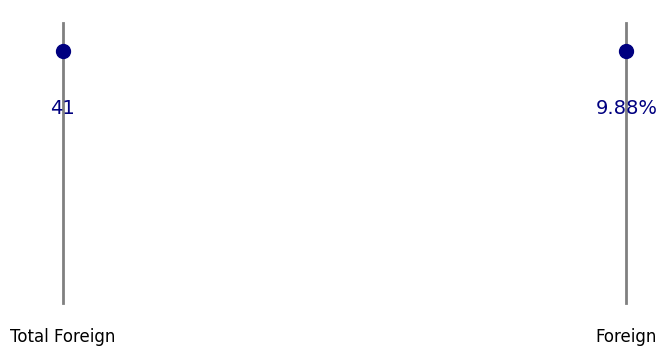

In [114]:
foreign_categories = ['Total Foreign', 'Foreign']
foreign_values = [41, 9.88] 
percentage = [False, True]
alpha = 1 - foreign_values[1]*0.01

fig, ax = plt.subplots(figsize=(8, 4))
x_pos = range(len(categories))

for i, (category, value, is_percentage) in enumerate(zip(foreign_categories, foreign_values, percentage)):
    ax.plot([i, i], [0, 1], color='grey', lw=2)
    ax.plot(i, alpha, 'o', markersize=10, color='navy')
    if is_percentage:
        ax.text(i, 0.7, f'{value}%', ha='center', va='center', fontsize=14, color='navy')
    else:
        ax.text(i, 0.7, f'{value}', ha='center', va='center', fontsize=14, color='navy')

ax.set_xticks(x_pos)
ax.set_xticklabels(foreign_categories, fontsize=12)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()